# 0. Cargar y mostrar las imagenes a color


In [ ]:
import cv2
import matplotlib.pyplot as plt


# Cargar las imagenes en color
imagenes = ['../image/1.png', '../image/2.png', '../image/3.png ', '../image/4.png']

for i in range(len(imagenes)):

        
    # Cargar la imagen en color (por defecto cv2.imread carga en BGR)
    imagen_color = cv2.imread(imagenes[i], cv2.IMREAD_COLOR)



    # Como Matplotlib espera RGB, convertimos de BGR a RGB
    imagen_rgb = cv2.cvtColor(imagen_color, cv2.COLOR_BGR2RGB)

    # Mostrar con Matplotlib
    plt.imshow(imagen_rgb)
    plt.title("Imagen a color")
    plt.axis("off")
    plt.show()



# 1. Segmetación con Bordes


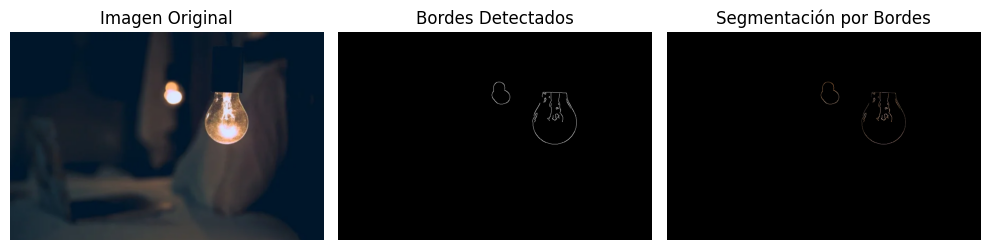

Imagen 1 procesada:
Valores de píxel en (100,200):
Original (escala de grises): 21
Suavizada: 21
Bordes: 0
Máscara (canal B): 0


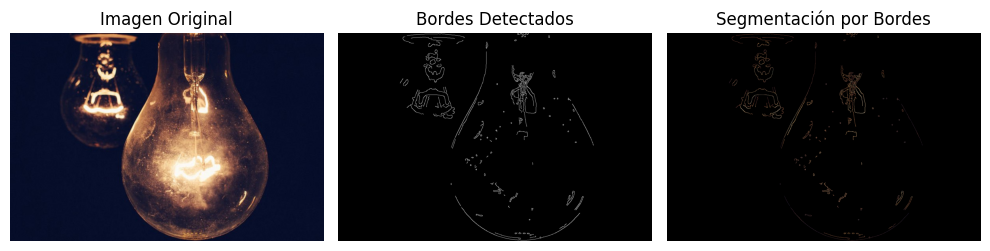

Imagen 2 procesada:
Valores de píxel en (100,200):
Original (escala de grises): 15
Suavizada: 15
Bordes: 0
Máscara (canal B): 0


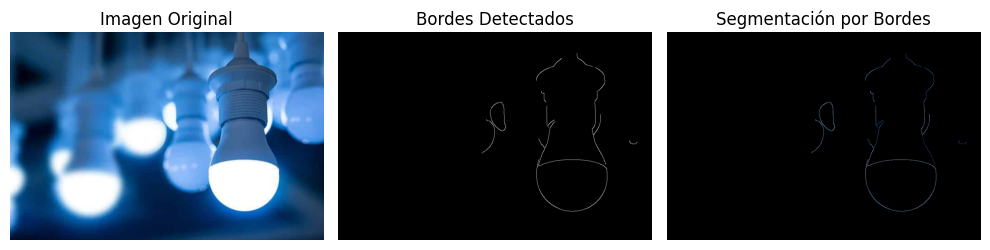

Imagen 3 procesada:
Valores de píxel en (100,200):
Original (escala de grises): 89
Suavizada: 89
Bordes: 0
Máscara (canal B): 0


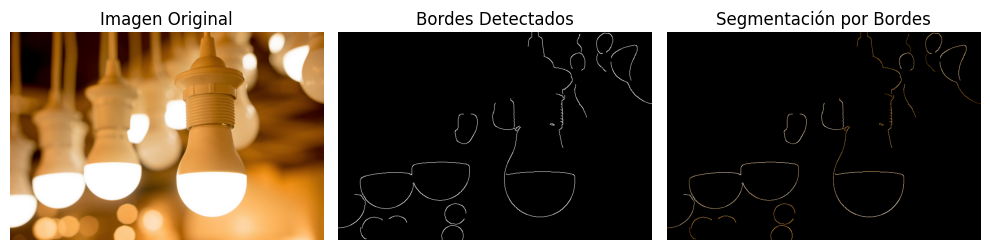

Imagen 4 procesada:
Valores de píxel en (100,200):
Original (escala de grises): 102
Suavizada: 102
Bordes: 0
Máscara (canal B): 0


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Lista de imágenes a procesar
imagenes = ['../image/1.png', '../image/2.png', '../image/3.png', '../image/4.png']

for i in range(len(imagenes)):
    # Cargar la imagen
    imagen = cv2.imread(imagenes[i], cv2.IMREAD_COLOR)
    imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

    # Aplicar un filtro Gaussiano para reducir el ruido
    imagen_suavizada = cv2.GaussianBlur(imagen_gris, (5, 5), 0)

    # Detectar bordes con el algoritmo de Canny
    bordes = cv2.Canny(imagen_suavizada, 100, 200)

    # Crear una máscara para segmentar la imagen
    mascara = cv2.bitwise_and(imagen, imagen, mask=bordes)

    # Mostrar los resultados
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 3, 1)
    plt.title("Imagen Original")
    plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title("Bordes Detectados")
    plt.imshow(bordes, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title("Segmentación por Bordes")
    plt.imshow(cv2.cvtColor(mascara, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.tight_layout()
    plt.show()
    
    # Guardar las imágenes procesadas
    cv2.imwrite(f"../image/resultados/segmentacion/segmentacionBordes/imagen-original-{i+1}.png", imagen)
    cv2.imwrite(f"../image/resultados/segmentacion/segmentacionBordes/imagen-suavizada-{i+1}.png", imagen_suavizada)
    cv2.imwrite(f"../image/resultados/segmentacion/segmentacionBordes/imagen-bordes-{i+1}.png", bordes)
    cv2.imwrite(f"../image/resultados/segmentacion/segmentacionBordes/imagen-mascara-{i+1}.png", mascara)

    print(f"Imagen {i+1} procesada:")
    print(f"Valores de píxel en (100,200):")
    print(f"Original (escala de grises): {imagen_gris[100, 200]}")
    print(f"Suavizada: {imagen_suavizada[100, 200]}")
    print(f"Bordes: {bordes[100, 200]}")
    print(f"Máscara (canal B): {mascara[100, 200, 0]}")
    print("=" * 50)


# 2. Segmetación Adaptatuva


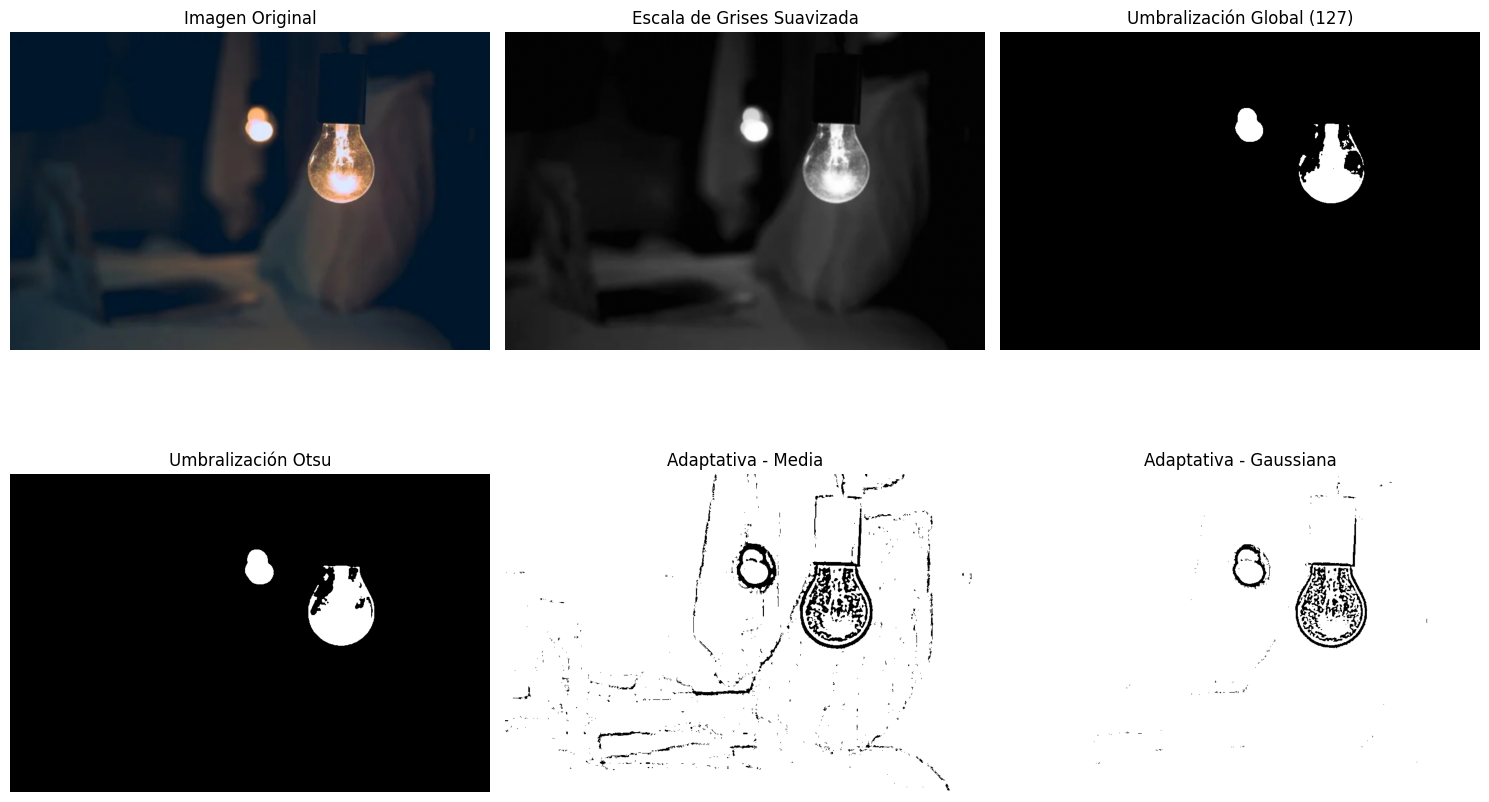

Imagen 1 procesada:
Valores de píxel en (100,200):
Original (escala de grises): 21
Suavizada: 21
Umbral global: 0
Umbral Otsu: 0
Adaptativa media: 255
Adaptativa gaussiana: 255


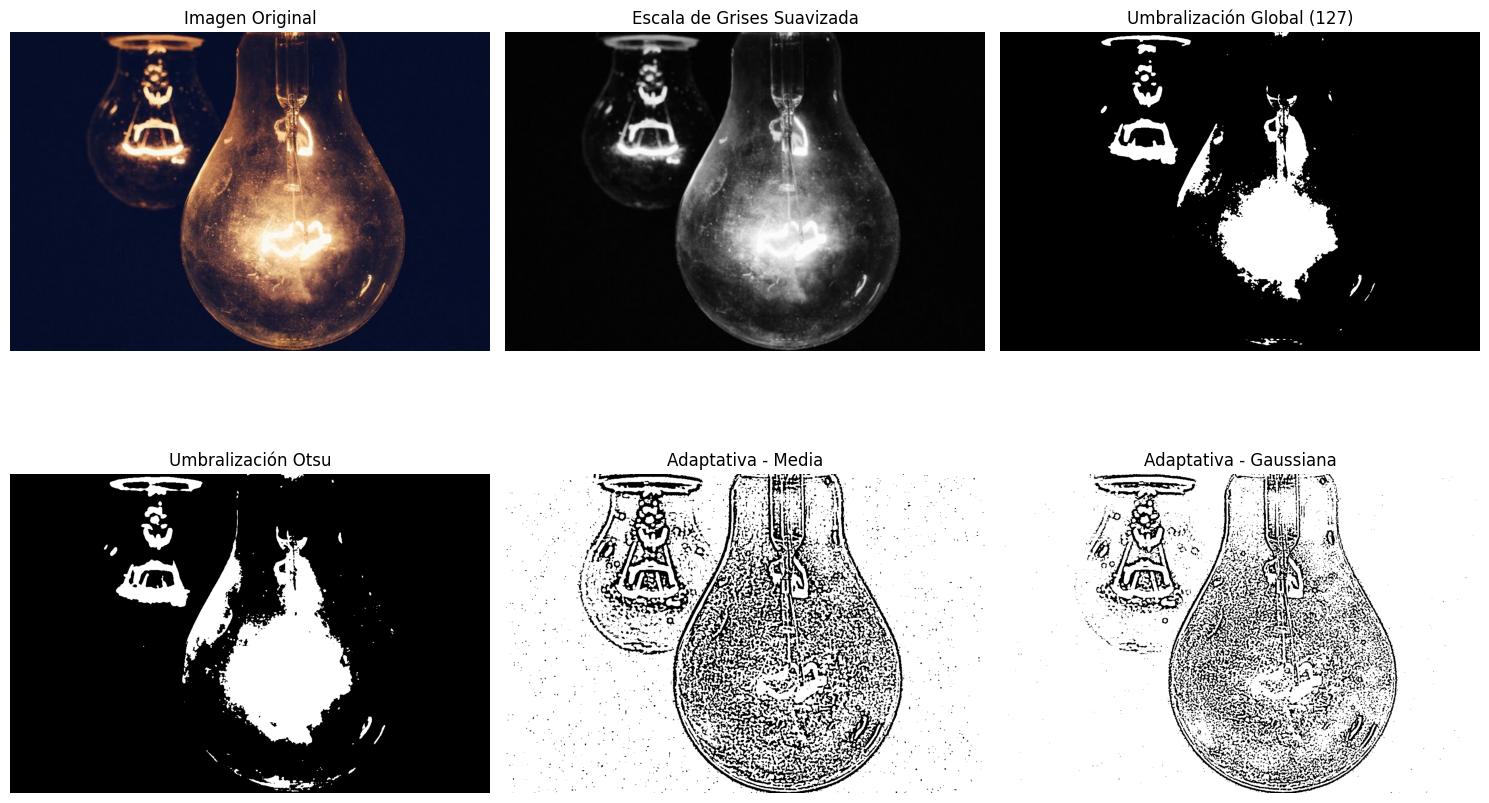

Imagen 2 procesada:
Valores de píxel en (100,200):
Original (escala de grises): 15
Suavizada: 15
Umbral global: 0
Umbral Otsu: 0
Adaptativa media: 255
Adaptativa gaussiana: 255


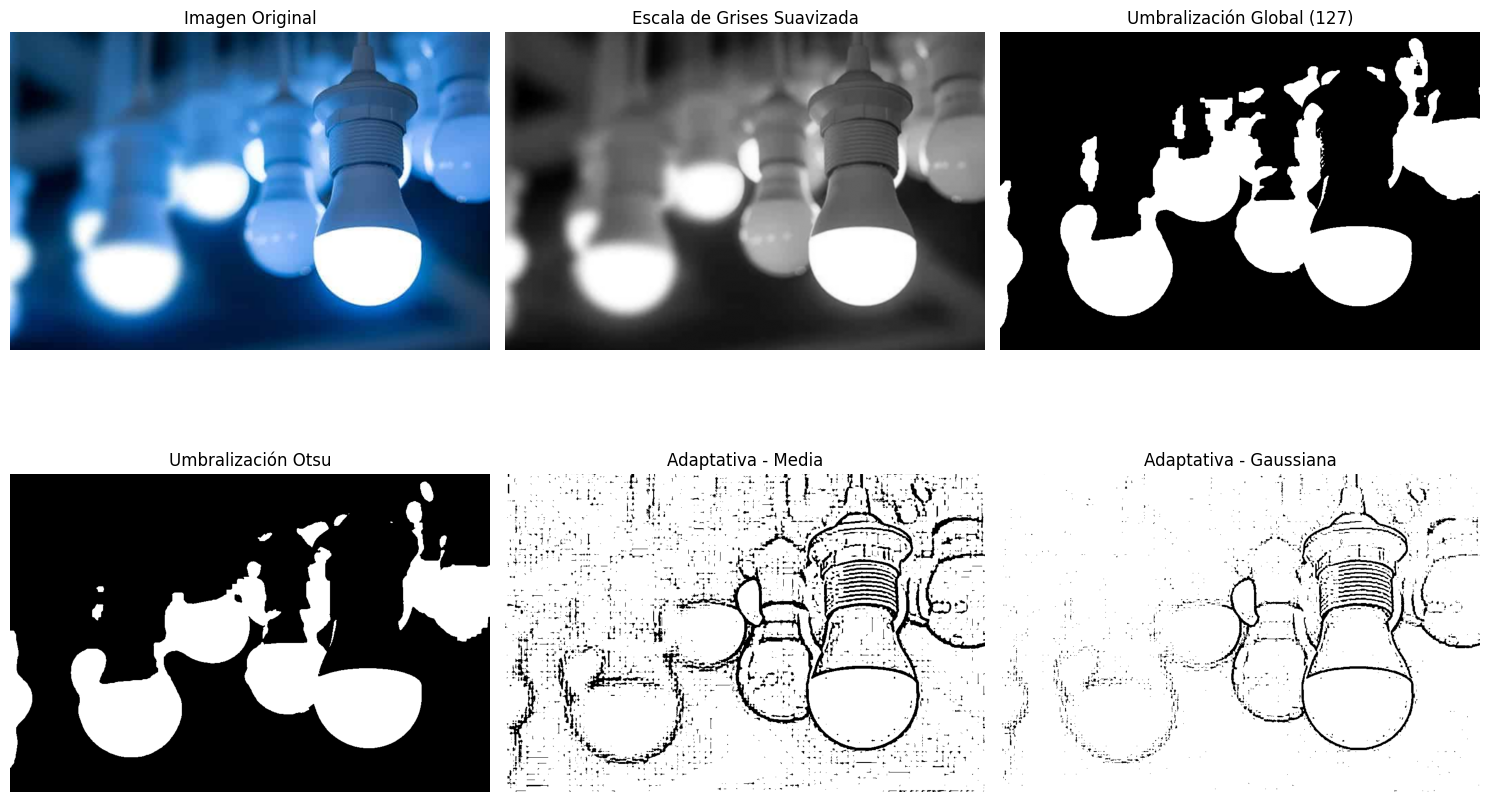

Imagen 3 procesada:
Valores de píxel en (100,200):
Original (escala de grises): 89
Suavizada: 89
Umbral global: 0
Umbral Otsu: 0
Adaptativa media: 255
Adaptativa gaussiana: 255


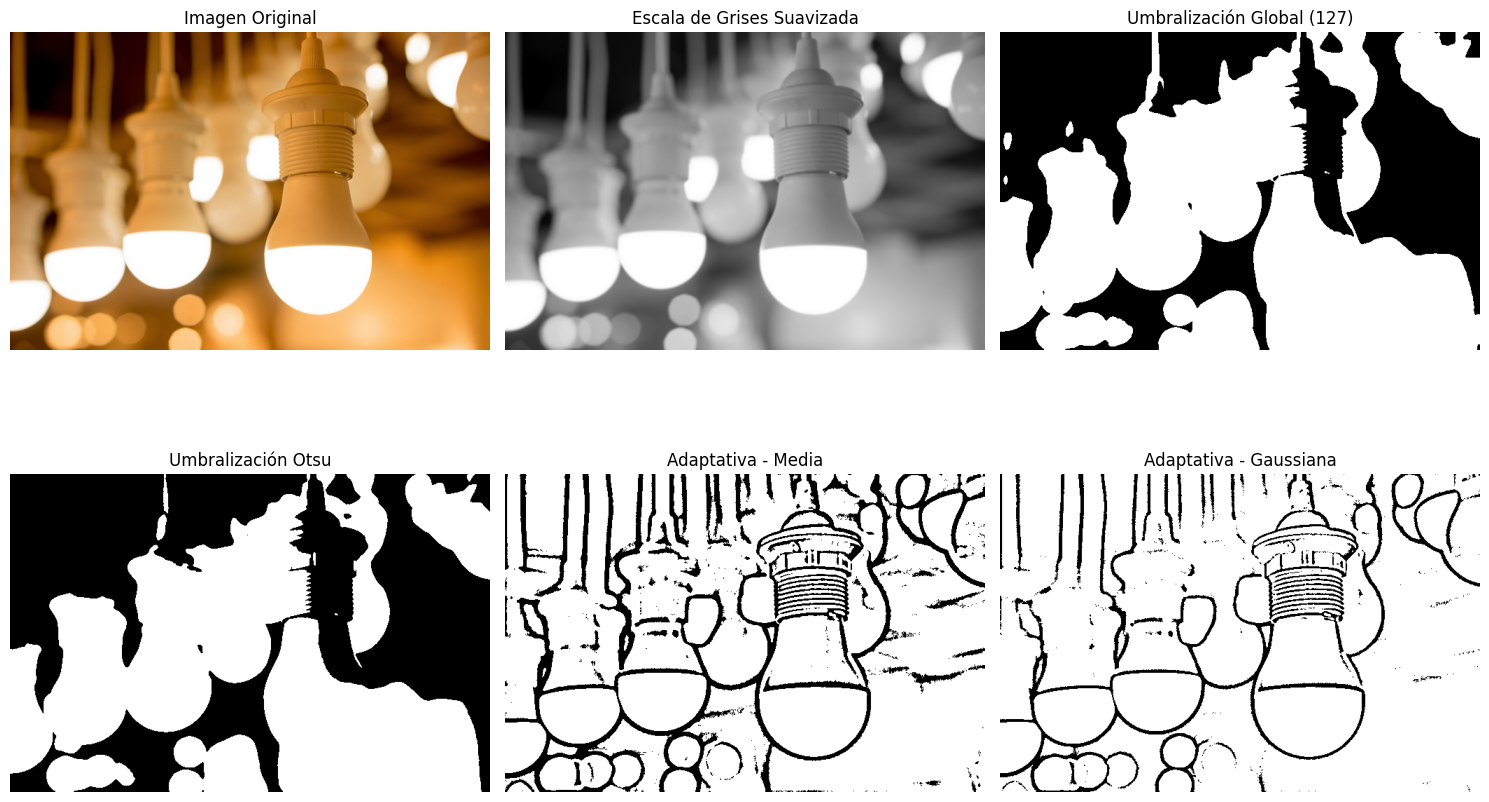

Imagen 4 procesada:
Valores de píxel en (100,200):
Original (escala de grises): 102
Suavizada: 102
Umbral global: 0
Umbral Otsu: 0
Adaptativa media: 255
Adaptativa gaussiana: 255


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Lista de imágenes a procesar
imagenes = ['../image/1.png', '../image/2.png', '../image/3.png', '../image/4.png']

for i in range(len(imagenes)):
    # Cargar la imagen
    imagen = cv2.imread(imagenes[i], cv2.IMREAD_COLOR)
    imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    
    # Aplicar filtro Gaussiano para reducir ruido
    imagen_suavizada = cv2.GaussianBlur(imagen_gris, (5, 5), 0)
    
    # Segmentación adaptativa - Método de la media
    # Los parámetros son: imagen, valor_maximo, tipo_adaptativo, tipo_umbral, tamaño_bloque, constante
    adaptativa_media = cv2.adaptiveThreshold(
        imagen_suavizada, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2
    )
    
    # Segmentación adaptativa - Método Gaussiano
    adaptativa_gaussiana = cv2.adaptiveThreshold(
        imagen_suavizada, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
    )
    
    # Umbralización global para comparación
    _, umbral_global = cv2.threshold(imagen_suavizada, 127, 255, cv2.THRESH_BINARY)
    
    # Umbralización de Otsu (automática)
    _, umbral_otsu = cv2.threshold(imagen_suavizada, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Mostrar los resultados
    plt.figure(figsize=(15, 10))
    
    # Imagen original
    plt.subplot(2, 3, 1)
    plt.title("Imagen Original")
    plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    
    # Imagen en escala de grises suavizada
    plt.subplot(2, 3, 2)
    plt.title("Escala de Grises Suavizada")
    plt.imshow(imagen_suavizada, cmap='gray')
    plt.axis('off')
    
    # Umbralización global
    plt.subplot(2, 3, 3)
    plt.title("Umbralización Global (127)")
    plt.imshow(umbral_global, cmap='gray')
    plt.axis('off')
    
    # Umbralización de Otsu
    plt.subplot(2, 3, 4)
    plt.title("Umbralización Otsu")
    plt.imshow(umbral_otsu, cmap='gray')
    plt.axis('off')
    
    # Segmentación adaptativa - Media
    plt.subplot(2, 3, 5)
    plt.title("Adaptativa - Media")
    plt.imshow(adaptativa_media, cmap='gray')
    plt.axis('off')
    
    # Segmentación adaptativa - Gaussiana
    plt.subplot(2, 3, 6)
    plt.title("Adaptativa - Gaussiana")
    plt.imshow(adaptativa_gaussiana, cmap='gray')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Guardar las imágenes procesadas
    cv2.imwrite(f"../image/resultados/segmentacion/segmentacionAdaptativa/imagen-original-{i+1}.png", imagen)
    cv2.imwrite(f"../image/resultados/segmentacion/segmentacionAdaptativa/imagen-suavizada-{i+1}.png", imagen_suavizada)
    cv2.imwrite(f"../image/resultados/segmentacion/segmentacionAdaptativa/umbral-global-{i+1}.png", umbral_global)
    cv2.imwrite(f"../image/resultados/segmentacion/segmentacionAdaptativa/umbral-otsu-{i+1}.png", umbral_otsu)
    cv2.imwrite(f"../image/resultados/segmentacion/segmentacionAdaptativa/adaptativa-media-{i+1}.png", adaptativa_media)
    cv2.imwrite(f"../image/resultados/segmentacion/segmentacionAdaptativa/adaptativa-gaussiana-{i+1}.png", adaptativa_gaussiana)
    
    print(f"Imagen {i+1} procesada:")
    print(f"Valores de píxel en (100,200):")
    print(f"Original (escala de grises): {imagen_gris[100, 200]}")
    print(f"Suavizada: {imagen_suavizada[100, 200]}")
    print(f"Umbral global: {umbral_global[100, 200]}")
    print(f"Umbral Otsu: {umbral_otsu[100, 200]}")
    print(f"Adaptativa media: {adaptativa_media[100, 200]}")
    print(f"Adaptativa gaussiana: {adaptativa_gaussiana[100, 200]}")
    print("=" * 60)


# 3. Segmetación Fija



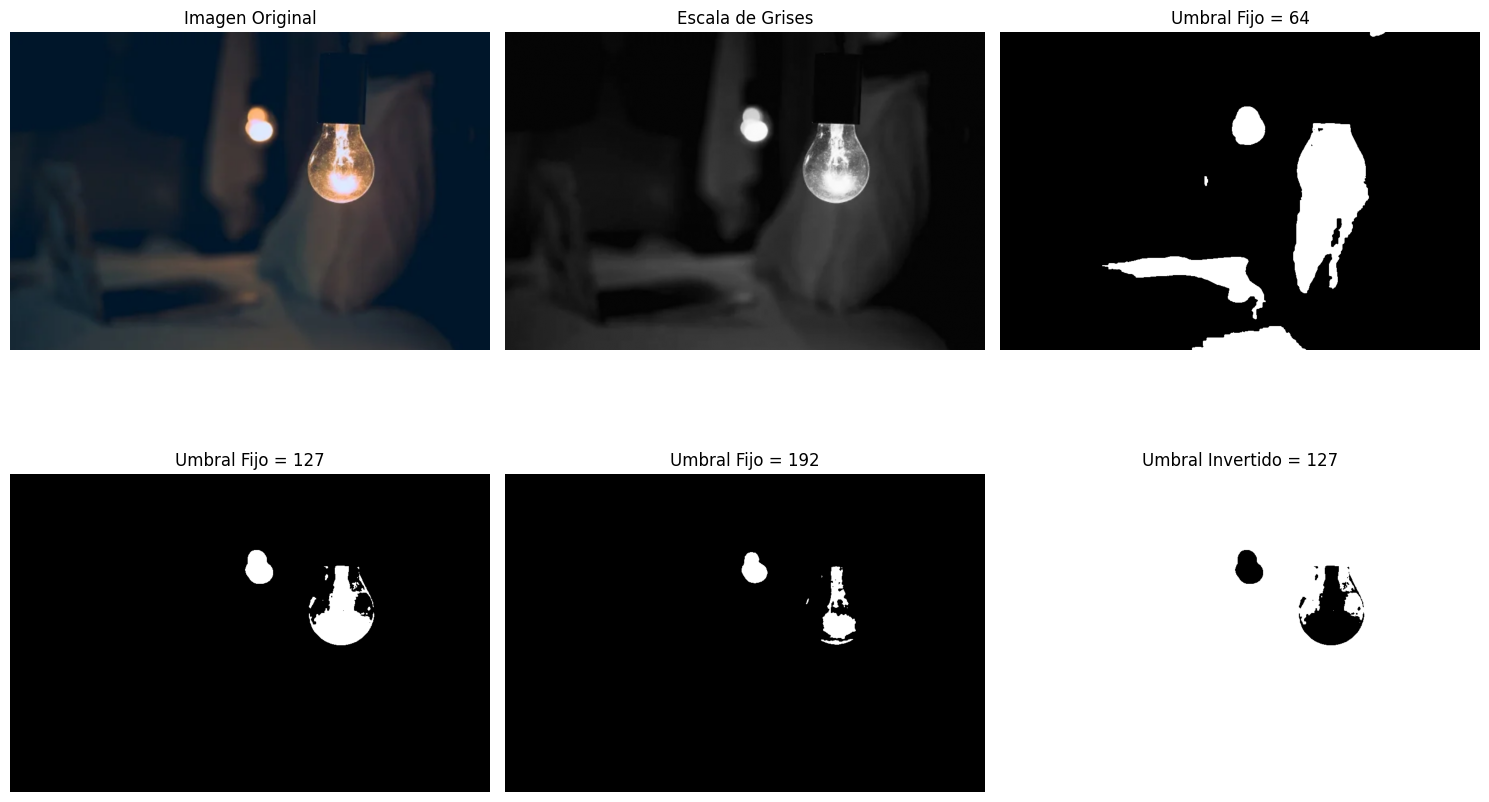

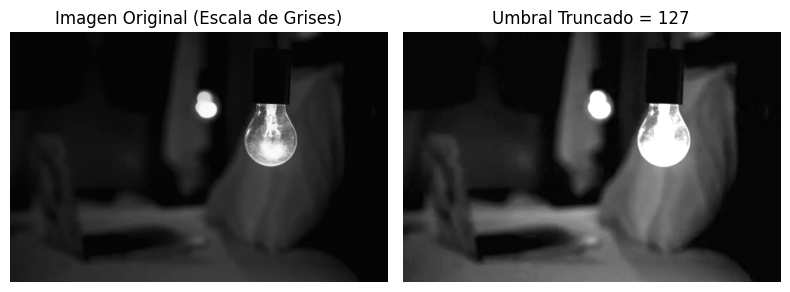

Imagen 1 procesada:
Valores de píxel en (100,200):
Original (escala de grises): 21
Umbral 64: 0
Umbral 127: 0
Umbral 192: 0
Umbral invertido: 255
Umbral truncado: 21


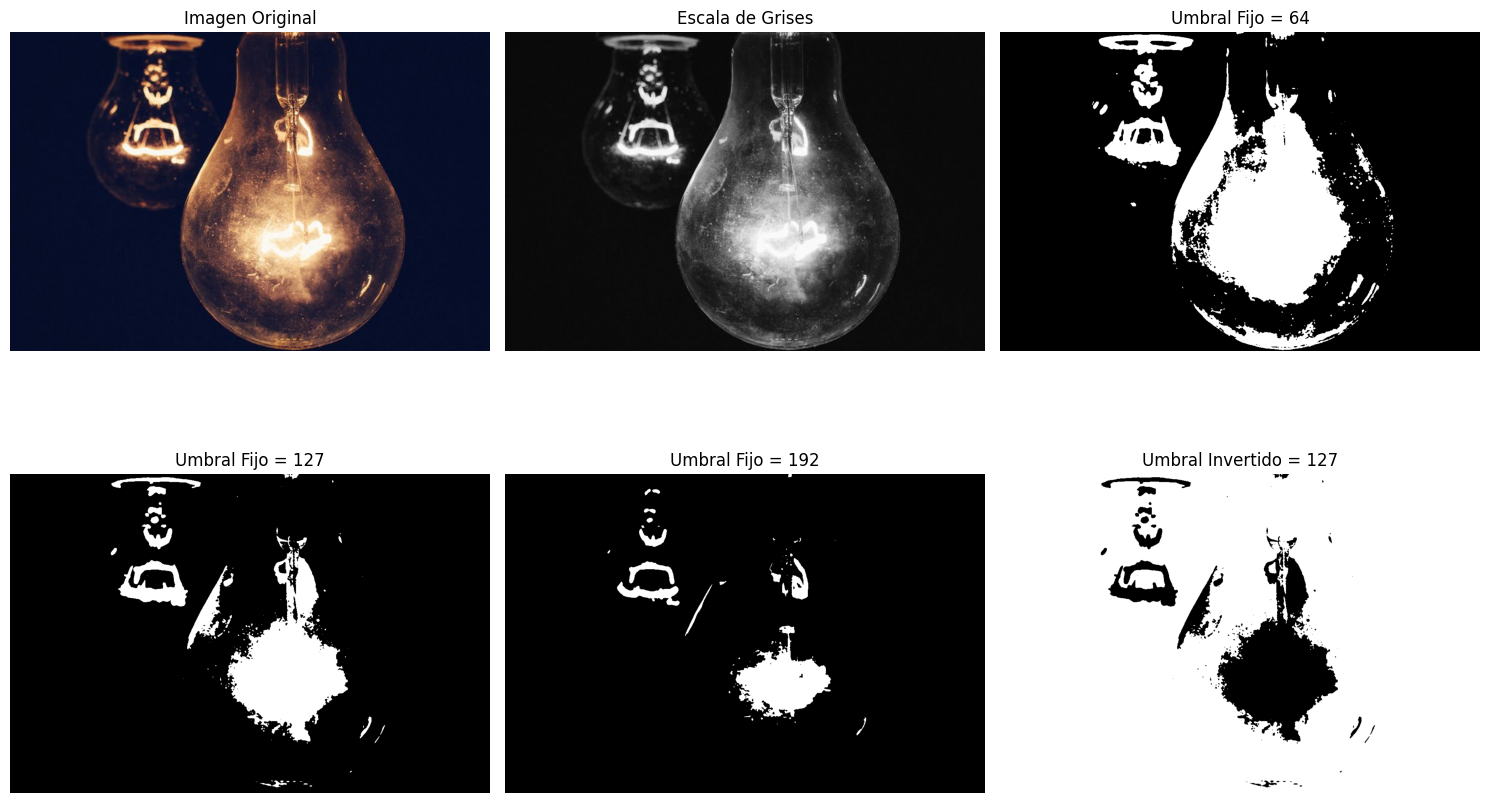

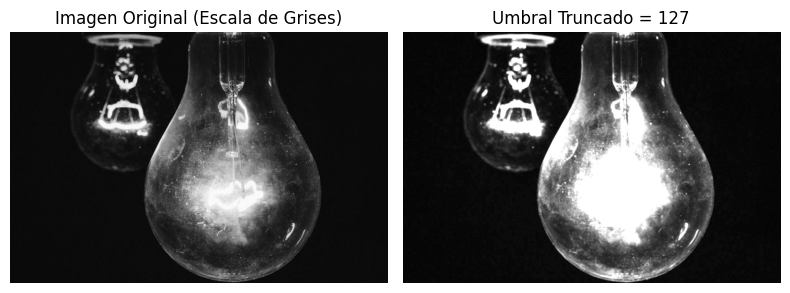

Imagen 2 procesada:
Valores de píxel en (100,200):
Original (escala de grises): 15
Umbral 64: 0
Umbral 127: 0
Umbral 192: 0
Umbral invertido: 255
Umbral truncado: 15


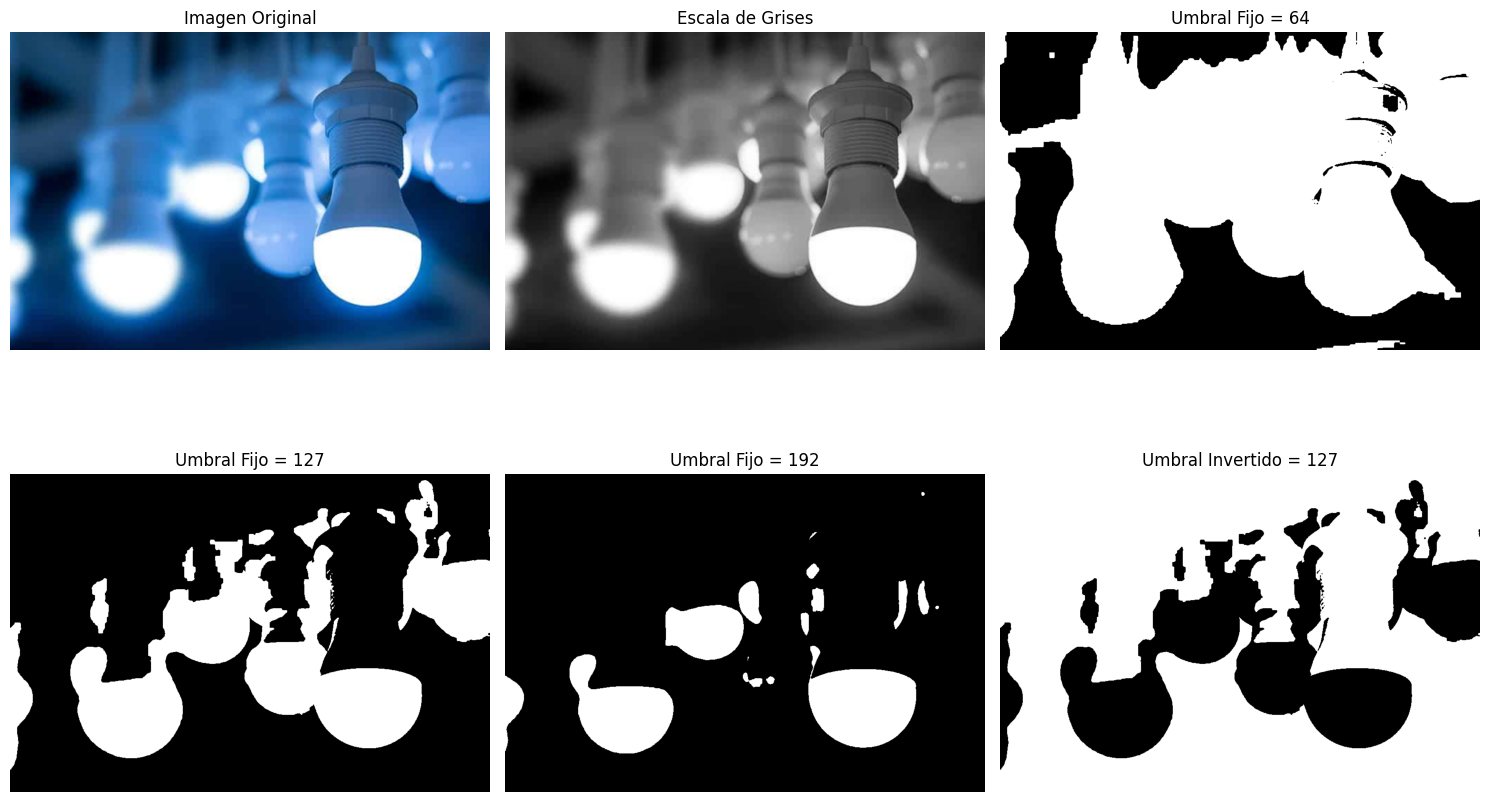

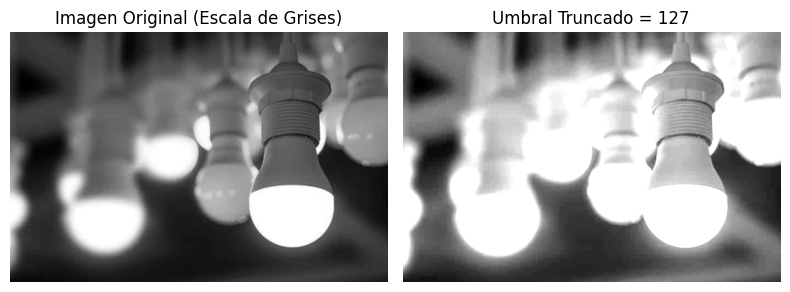

Imagen 3 procesada:
Valores de píxel en (100,200):
Original (escala de grises): 89
Umbral 64: 255
Umbral 127: 0
Umbral 192: 0
Umbral invertido: 255
Umbral truncado: 89


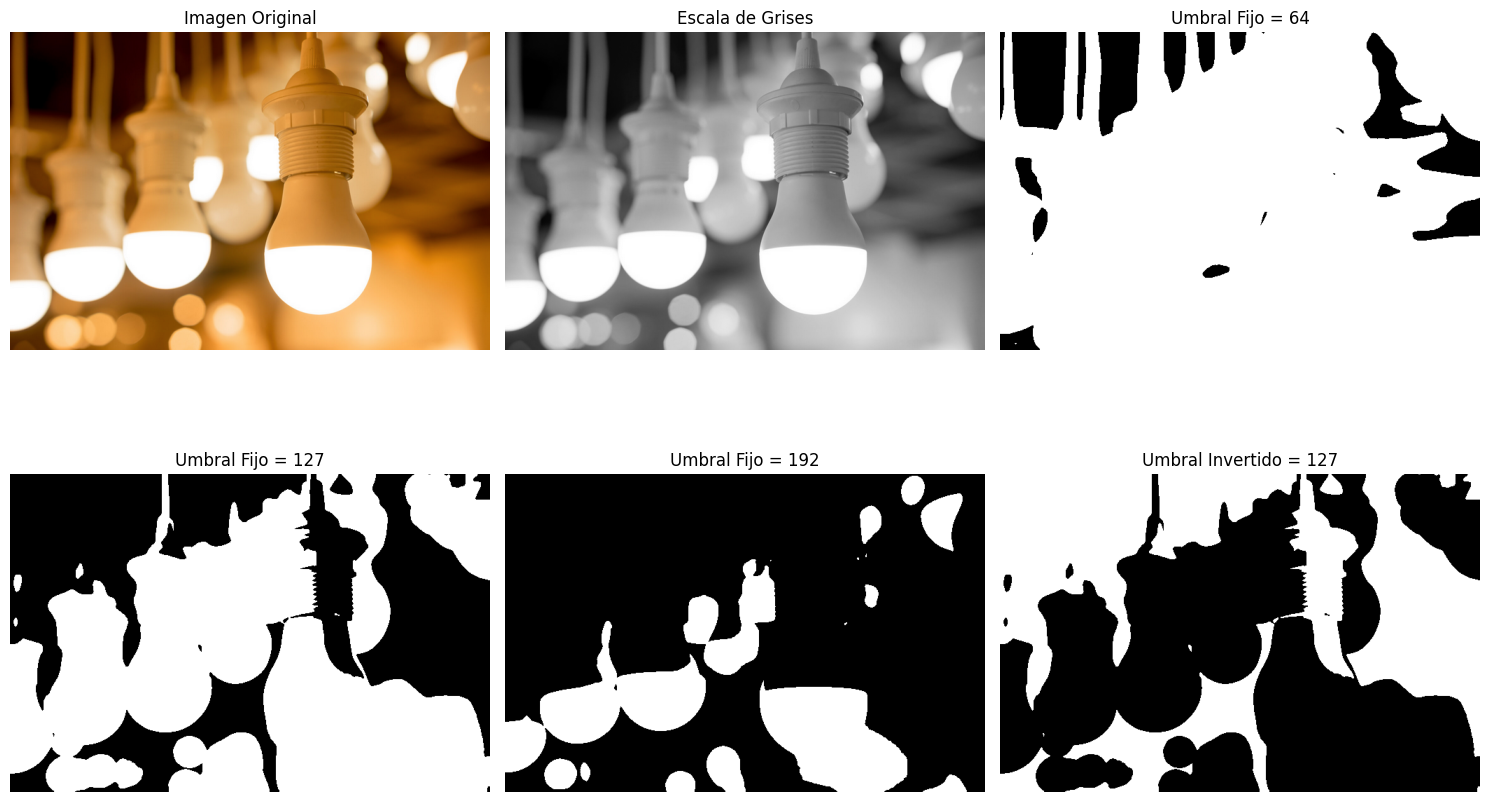

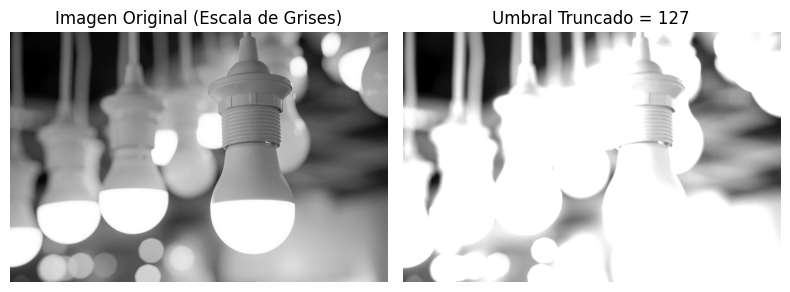

Imagen 4 procesada:
Valores de píxel en (100,200):
Original (escala de grises): 102
Umbral 64: 255
Umbral 127: 0
Umbral 192: 0
Umbral invertido: 255
Umbral truncado: 102


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Lista de imágenes a procesar
imagenes = ['../image/1.png', '../image/2.png', '../image/3.png', '../image/4.png']

for i in range(len(imagenes)):
    # Cargar la imagen
    imagen = cv2.imread(imagenes[i], cv2.IMREAD_COLOR)
    imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    
    # Aplicar filtro Gaussiano para reducir ruido (opcional)
    imagen_suavizada = cv2.GaussianBlur(imagen_gris, (5, 5), 0)
    
    # Segmentación por umbral fijo - diferentes valores
    # Umbral bajo (64) - más áreas blancas
    _, umbral_64 = cv2.threshold(imagen_suavizada, 64, 255, cv2.THRESH_BINARY)
    
    # Umbral medio (127) - equilibrado
    _, umbral_127 = cv2.threshold(imagen_suavizada, 127, 255, cv2.THRESH_BINARY)
    
    # Umbral alto (192) - menos áreas blancas
    _, umbral_192 = cv2.threshold(imagen_suavizada, 192, 255, cv2.THRESH_BINARY)
    
    # Umbral invertido (127) - invierte los colores
    _, umbral_invertido = cv2.threshold(imagen_suavizada, 127, 255, cv2.THRESH_BINARY_INV)
    
    # Umbral truncado (127) - corta los valores por encima del umbral
    _, umbral_truncado = cv2.threshold(imagen_suavizada, 127, 255, cv2.THRESH_TRUNC)
    
    # Mostrar los resultados
    plt.figure(figsize=(15, 10))
    
    # Imagen original
    plt.subplot(2, 3, 1)
    plt.title("Imagen Original")
    plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    
    # Imagen en escala de grises
    plt.subplot(2, 3, 2)
    plt.title("Escala de Grises")
    plt.imshow(imagen_gris, cmap='gray')
    plt.axis('off')
    
    # Umbral 64
    plt.subplot(2, 3, 3)
    plt.title("Umbral Fijo = 64")
    plt.imshow(umbral_64, cmap='gray')
    plt.axis('off')
    
    # Umbral 127
    plt.subplot(2, 3, 4)
    plt.title("Umbral Fijo = 127")
    plt.imshow(umbral_127, cmap='gray')
    plt.axis('off')
    
    # Umbral 192
    plt.subplot(2, 3, 5)
    plt.title("Umbral Fijo = 192")
    plt.imshow(umbral_192, cmap='gray')
    plt.axis('off')
    
    # Umbral invertido
    plt.subplot(2, 3, 6)
    plt.title("Umbral Invertido = 127")
    plt.imshow(umbral_invertido, cmap='gray')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Mostrar también umbral truncado por separado
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.title("Imagen Original (Escala de Grises)")
    plt.imshow(imagen_gris, cmap='gray')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.title("Umbral Truncado = 127")
    plt.imshow(umbral_truncado, cmap='gray')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Guardar las imágenes procesadas
    cv2.imwrite(f"../image/resultados/segmentacion/segmentacionFija/imagen-original-{i+1}.png", imagen)
    cv2.imwrite(f"../image/resultados/segmentacion/segmentacionFija/imagen-gris-{i+1}.png", imagen_gris)
    cv2.imwrite(f"../image/resultados/segmentacion/segmentacionFija/umbral-64-{i+1}.png", umbral_64)
    cv2.imwrite(f"../image/resultados/segmentacion/segmentacionFija/umbral-127-{i+1}.png", umbral_127)
    cv2.imwrite(f"../image/resultados/segmentacion/segmentacionFija/umbral-192-{i+1}.png", umbral_192)
    cv2.imwrite(f"../image/resultados/segmentacion/segmentacionFija/umbral-invertido-{i+1}.png", umbral_invertido)
    cv2.imwrite(f"../image/resultados/filtros/umbral_fijo/umbral-truncado-{i+1}.png", umbral_truncado)
    
    print(f"Imagen {i+1} procesada:")
    print(f"Valores de píxel en (100,200):")
    print(f"Original (escala de grises): {imagen_gris[100, 200]}")
    print(f"Umbral 64: {umbral_64[100, 200]}")
    print(f"Umbral 127: {umbral_127[100, 200]}")
    print(f"Umbral 192: {umbral_192[100, 200]}")
    print(f"Umbral invertido: {umbral_invertido[100, 200]}")
    print(f"Umbral truncado: {umbral_truncado[100, 200]}")
    print("=" * 60)